In [1]:
# importing the necessary libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# paths to the files
forest_masks = {
    2001: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2001_forest.tif",
    2008: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2008_forest.tif",
    2016: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2016_forest.tif",
    2024: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2024_forest.tif"
}

In [3]:
# using a clean 2-color scheme
cmap = ListedColormap(['#f0f0f0', '#006400'])

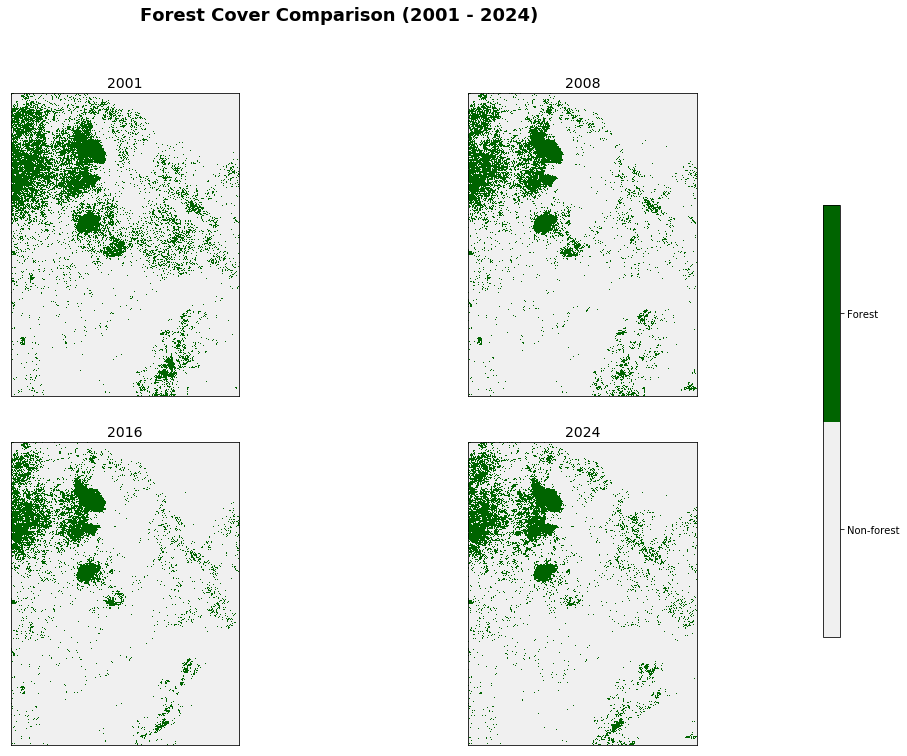

In [ ]:
fig, ax_grid = plt.subplots(2, 2, figsize=(16, 12))
axes = ax_grid.ravel()

# plotting the raster maps
for ax, (year, path) in zip(axes, sorted(forest_masks.items())):
    with rasterio.open(path) as src:
        mask = src.read(1).astype(float)
        bounds = src.bounds
        extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

    ax.imshow(mask, cmap=cmap, vmin=0, vmax=1, extent=extent)
    ax.set_title(str(year), fontsize=14, pad=6)
    ax.set_xticks([])
    ax.set_yticks([])

# adjusting the subplot placing
plt.subplots_adjust(wspace=0.05, hspace=0.15)

fig.suptitle("Forest Cover Comparison (2001 - 2024)", 
             fontsize=18, fontweight='bold', y=0.98)

# creating separate axes for colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])  # [left, bottom, width, height]

cbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    cax=cbar_ax
)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(["Non-forest", "Forest"])

plt.show()